# MO433 - Introdução ao Processamento Digital de Imagem: Trabalho 03

Professor: Hélio Pedrini

Aluno: Gabriel Ayres de Oliveira

Para esse trabalho serão explorados conceitos de segmentação e caracterização de objetos em imagens. O fluxo de trabalho consistirá em apresentar os contornos dos objetos, em seguida serão extraídos destes objetos sus características como centróide, perímetro e área. Por fim um histograma mostrará as informações em relação à distribuição de três tipos de área.

### Carregando bibliotecas e inicializando variáveis comuns

In [84]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from scipy import ndimage
from google.colab.patches import cv2_imshow as cv_imshow

#Essa variável define se o código está sendo executado em notebook ou não,
#de modo que possa ser convertido em um script facilmente.

notebook = False

In [85]:
if(notebook):
  #Carregando imagens para fins de teste
  !wget  -nc -q https://www.ic.unicamp.br/~helio/imagens_objetos_coloridos/objetos1.png
  !wget  -nc -q https://www.ic.unicamp.br/~helio/imagens_objetos_coloridos/objetos2.png
  !wget  -nc -q https://www.ic.unicamp.br/~helio/imagens_objetos_coloridos/objetos3.png
  arquivo = "objetos3.png"
  img = cv.imread(arquivo)



In [86]:
if(not notebook):
  try:
    arquivo = sys.argv[1]
    img = cv.imread(arquivo) 
  except:
    print("Sintaxe: trabalho03.py  filename")

## A imagem original e sua conversão para escala de cinza

Nessa seção será feita a conversão da imagem em escala de cinza. É interessante salientar que o OpenCV carrega as imagens por padrão em BGR, enquanto o matplotlib se utiliza do padrão RGB, assim caso queira-se mostrar imagens carregadas por um em outro as conversões devem ser feitas de acordo ou as cores da imagem resultante não serão as corretas devido aos canais trocados. São mostradas então as imagens em escala de cinza e binarizada.

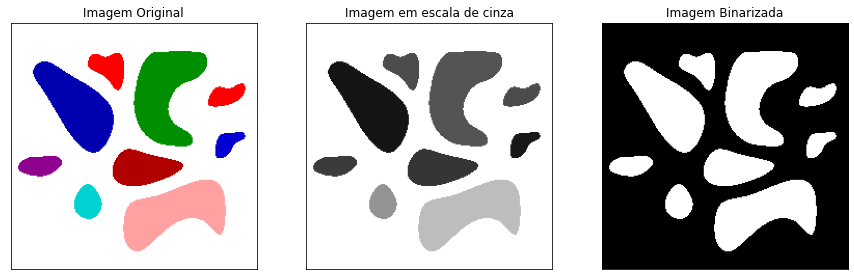

In [87]:
#Convertendo em escala de cinza
img_grayscale = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

#Fazendo a binarização com thresh_binary (quarto argumento dafunção)
ret,img_binary = cv.threshold(img_grayscale,200,255,cv.THRESH_BINARY_INV)

cv.imwrite("grayscale_" + arquivo, img_grayscale)
cv.imwrite("binarized_" + arquivo, img_binary)

if(notebook):
  plt.figure(figsize=[15,10])
  plt.subplot(1,3,1)
  plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
  plt.xticks([]), plt.yticks([])
  plt.title("Imagem Original")

  plt.subplot(1,3,2)
  plt.imshow(cv.cvtColor(img_grayscale, cv.COLOR_BGR2RGB))
  plt.xticks([]), plt.yticks([])
  plt.title("Imagem em escala de cinza")

  plt.subplot(1,3,3)
  plt.imshow(cv.cvtColor(img_binary, cv.COLOR_BGR2RGB))
  plt.xticks([]), plt.yticks([])
  plt.title("Imagem Binarizada")



##Contorno dos objetos

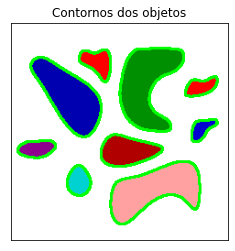

In [88]:
contours, hierarchy = cv.findContours(img_binary,cv.RETR_LIST,cv.CHAIN_APPROX_SIMPLE)
conts = np.copy(img)
for c in contours:
  #Calculando para cada contorno os seus momentos
  M = cv.moments(c)
  cv.drawContours(conts, [c], -1, (0, 255, 0), 2)

cv.imwrite("contours_" + arquivo, conts)

if(notebook):
  plt.imshow(cv.cvtColor(conts, cv.COLOR_BGR2RGB))
  plt.xticks([]), plt.yticks([])
  plt.title("Contornos dos objetos")
  plt.show()

## Extração de propriedades dos objetos

(Região 0) Área: 633.5 Perímetro: 96.32590103149414 Excentricidade: 829.9898810236408 Solidez: 0.9776234567901234
(Região 1) Área: 3801.0 Perímetro: 305.4213535785675 Excentricidade: 73.09875809201974 Solidez: 0.7688884393648225
(Região 2) Área: 595.5 Perímetro: 103.0121921300888 Excentricidade: 183.81249111674364 Solidez: 0.9682926829268292
(Região 3) Área: 1606.5 Perímetro: 174.1248903274536 Excentricidade: 196.20105822177266 Solidez: 0.9692307692307692
(Região 4) Área: 398.0 Perímetro: 88.76955211162567 Excentricidade: 895.4226259774289 Solidez: 0.9055745164960182
(Região 5) Área: 496.0 Perímetro: 99.25483322143555 Excentricidade: 1051.4984543339071 Solidez: 0.9001814882032668
(Região 6) Área: 3477.5 Perímetro: 259.46298480033875 Excentricidade: 87.84380143239937 Solidez: 0.9769630566090743
(Região 7) Área: 738.5 Perímetro: 119.98275482654572 Excentricidade: 228.81975510453697 Solidez: 0.890295358649789
(Região 8) Área: 3831.0 Perímetro: 313.7644993066788 Excentricidade: 37.78633027

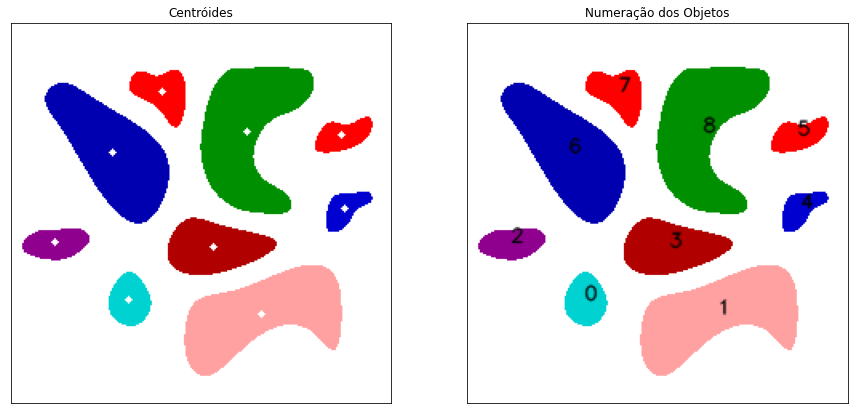

In [89]:
centermarked = np.copy(img)
centernumbered = np.copy(img)
contador = 0
font = cv.FONT_HERSHEY_SIMPLEX
hist = np.zeros([3])
for c in contours:
  #Calculando para cada contorno os seus momentos
  M = cv.moments(c)

  #Calculando seu centro
  cX = int(M["m10"] / M["m00"])
  cY= int(M["m01"] / M["m00"])
  cv.putText(centernumbered, str(contador),(cX, cY),font, 0.4,(0,0,0),1,cv.LINE_AA)
  cv.circle(centermarked, (cX, cY), 2, (255, 255, 255), -1)

  #Cálculo de Área 
  area = cv.contourArea(c)

  #Cálculo de Perímetro
  perimeter = cv.arcLength(c,True)

  #Calculo de Solidez
  hull = cv.convexHull(c)
  hull_area = cv.contourArea(hull)
  solidity = float(area)/hull_area

  #calculo de excentricidade
  eccentricity = (M["m20"] + M["m02"] + np.sqrt(np.power((M["m20"] - M["m02"]), 2) + 4 * np.power(M["m11"],2)))\
                  /(M["m20"] + M["m02"] - np.sqrt(np.power((M["m20"] - M["m02"]), 2) + 4 * np.power(M["m11"],2)))

  print("(Região " + str(contador) + ") Área: " + str(area) + " Perímetro: "  + str(perimeter) + " Excentricidade: "  + str(eccentricity) + " Solidez: "  + str(solidity))
  contador += 1

  #contando áreas para o histograma
  if area < 1500:
    hist[0] += 1
  
  if area >= 1500 and area < 3000:
    hist[1] += 1
  
  if area >= 3000:
    hist[2] += 1

cv.imwrite("centroids_" + arquivo, centermarked)
cv.imwrite("objnumbers_" + arquivo, centernumbered)

if(notebook):
  plt.figure(figsize=[15,10])
  plt.subplot(1,2,1)
  plt.imshow(cv.cvtColor(centermarked, cv.COLOR_BGR2RGB))
  plt.xticks([]), plt.yticks([])
  plt.title("Centróides")

  plt.subplot(1,2,2)
  plt.imshow(cv.cvtColor(centernumbered, cv.COLOR_BGR2RGB))
  plt.xticks([]), plt.yticks([])
  plt.title("Numeração dos Objetos")
plt.show()

##Histograma das áreas dos objetos

Número de regiões pequenas: 5
Número de regiões médias: 1
Número de regiões grandes: 3


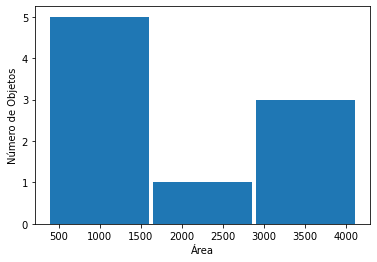

In [90]:
print("Número de regiões pequenas: %d" %hist[0])
print("Número de regiões médias: %d" %hist[1])
print("Número de regiões grandes: %d" %hist[2])

x = np.array([1000,2250,3500])

plt.figure()
plt.ylabel("Número de Objetos")
plt.xlabel("Área")
plt.bar(x, hist, width=1200)
plt.savefig("histogram_" + arquivo)
if(notebook):
  plt.show()

